## 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

### (1) 데이터 가져오기

In [1]:
import pandas as pd
import os

csv_path=os.getcwd()+'/bike_sharing_demand/train.csv'
trains=pd.read_csv(csv_path)

trains

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

칼럼 추가하니 원본 데이터 train 변수에 카피하여 원본 데이터 유지

In [2]:
train=trains.copy()
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
type(train['datetime'])

pandas.core.series.Series

datetime 함수 사용해 datetime형식으로 변환

In [4]:
train['datetime']=pd.to_datetime(train['datetime'])
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

dtype datetime임을 확인

#### 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성

In [5]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second

train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

<AxesSubplot:xlabel='second', ylabel='count'>

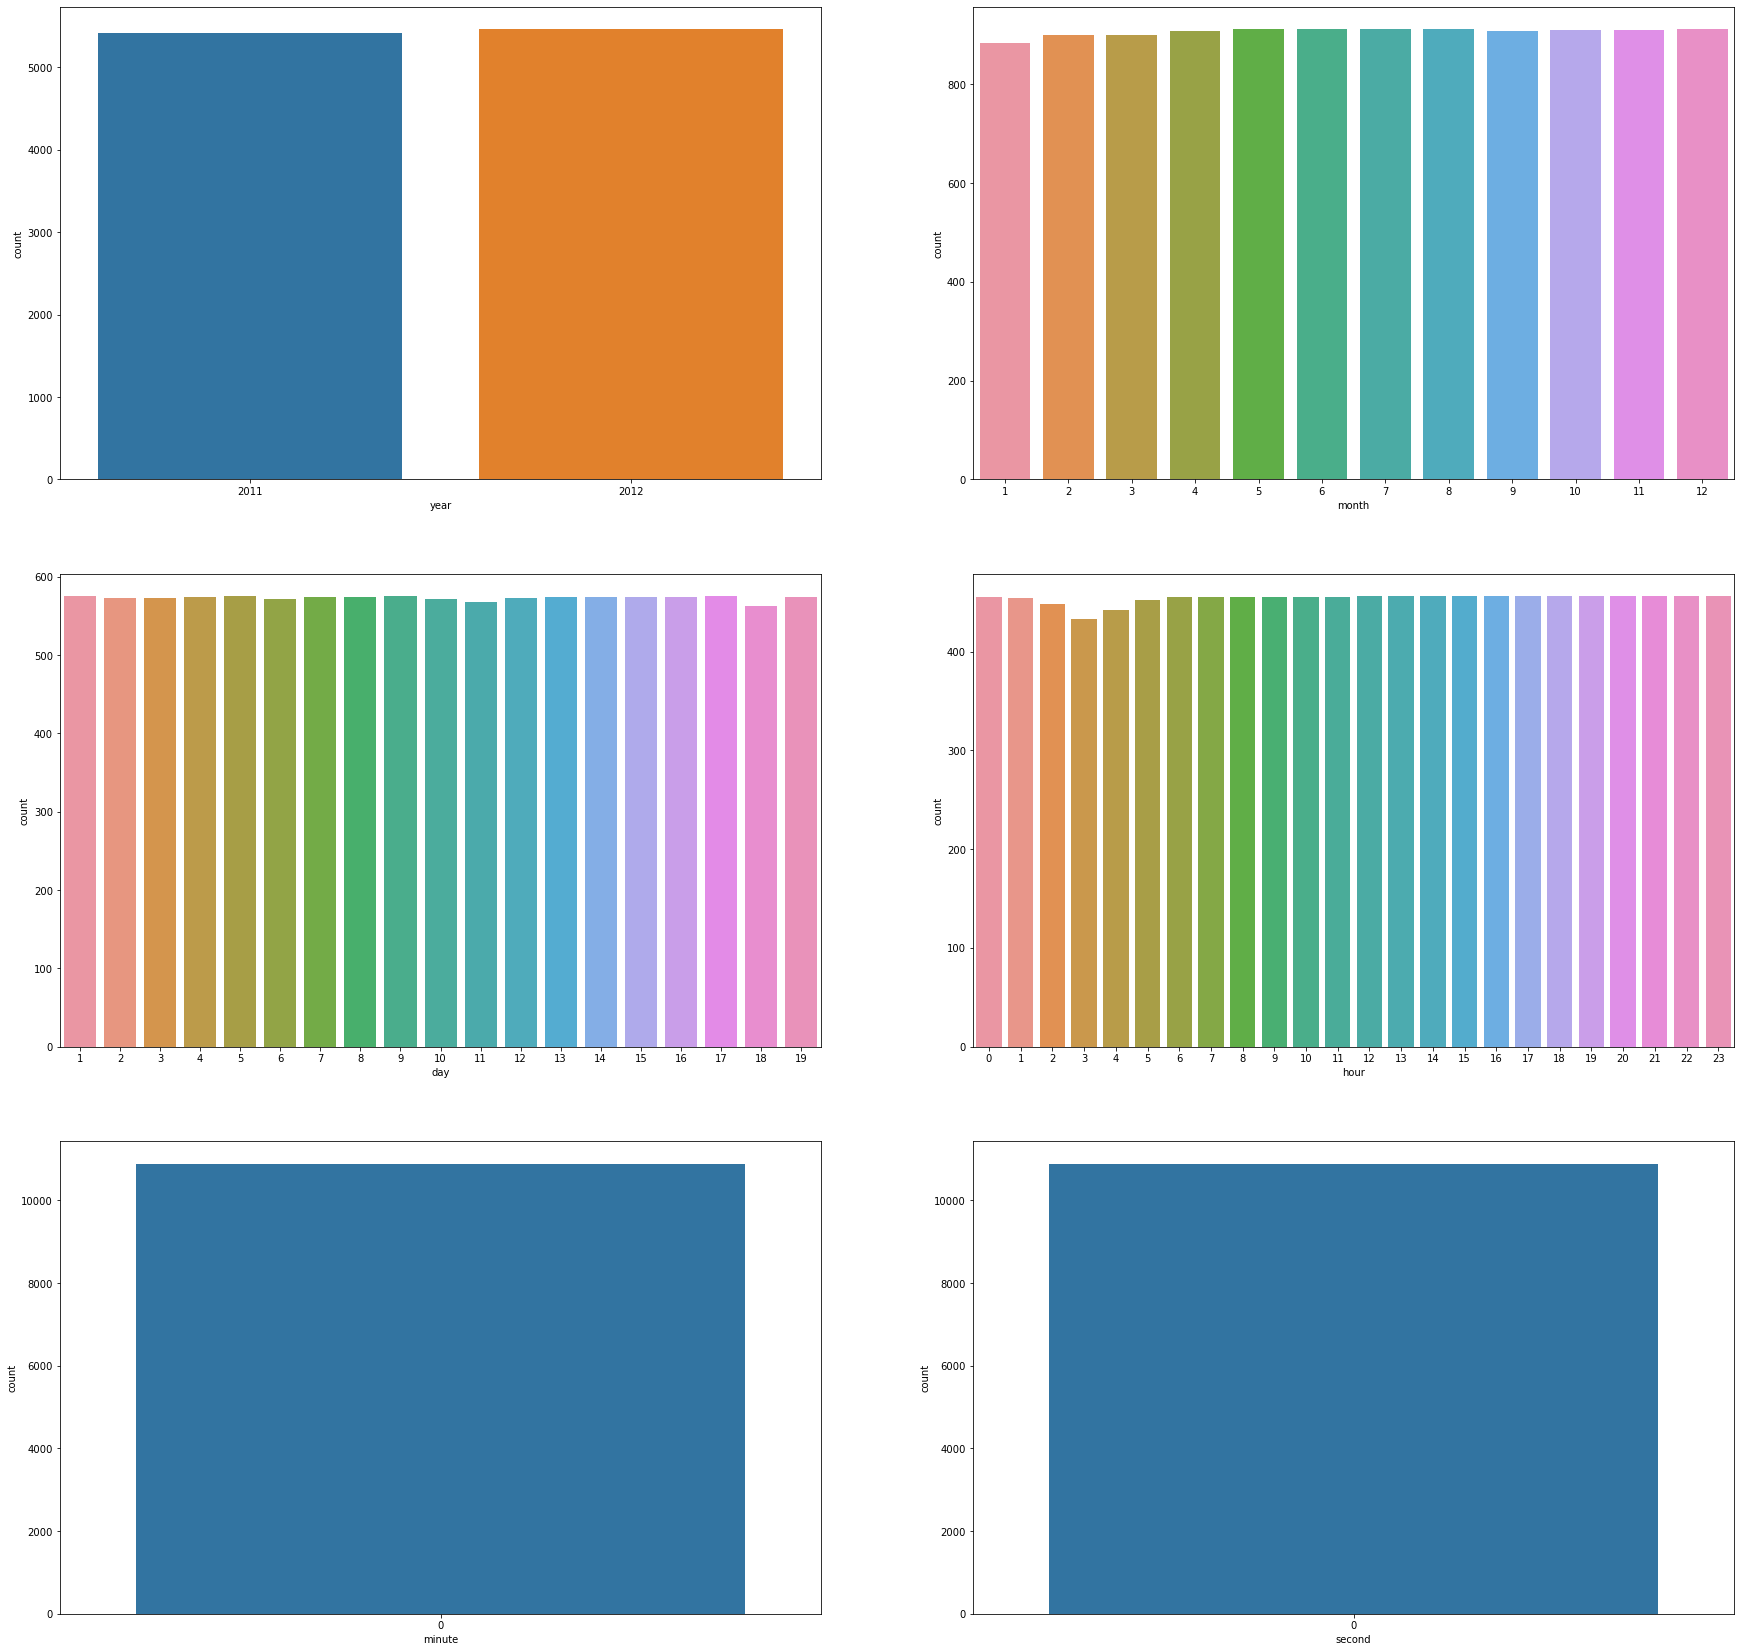

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 자동 사이즈 조정 
%matplotlib inline

plt.figure(figsize=(30,40))

plt.subplot(4,2,1)
sns.countplot(x='year', data=train)

plt.subplot(4,2,2)
sns.countplot(x='month', data=train)

plt.subplot(4,2,3)
sns.countplot(x='day', data=train)

plt.subplot(4,2,4)
sns.countplot(x='hour', data=train)

plt.subplot(4,2,5)
sns.countplot(x='minute', data=train)

plt.subplot(4,2,6)
sns.countplot(x='second', data=train)

### (4)  X, y 컬럼 선택 및 train/test 데이터 분리

날씨 좋은 날 바이크 타는 사람을 예측하므로, 요소에 날씨 관련 칼럼들이 많은 것을 볼 수 있다. 

하지만 casual(미등록 사용자 렌탈 횟수), registered(등록된 사용자 렌탈 횟수) 변수들은 불필요해보이므로 제외한다.

In [7]:
from sklearn.model_selection import train_test_split

df_x=train[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','day','hour','minute','second']]
df_y=train['count']

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8708, 14) (8708,)
(2178, 14) (2178,)


### (5) LinearRegression 모델 학습

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

예측값 출력하기

In [9]:
predictions = model.predict(x_test)
predictions

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

모델이 예측한 값과 정갑 간의 
손실함수 값 계산

In [10]:
loss=predictions-y_test
loss

3133     121.106270
5786      35.797655
5224      37.906767
8953      59.785832
8054     166.486548
            ...    
1963    -126.869802
5807      66.593142
10061   -199.247198
5427      33.170302
7588       4.626974
Name: count, Length: 2178, dtype: float64

mse 값과 함께 rmse 값도 계산하기

In [11]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("MSE =",mse)

rmse=np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE =",rmse)

MSE = 19945.37005375342
RMSE = 141.22807813516908


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

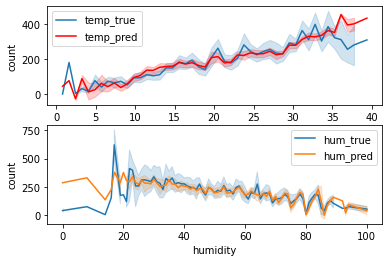

In [12]:
plt.subplot(2,1,1)
sns.lineplot(x=x_test['temp'], y=y_test,  label="temp_true")
sns.lineplot(x=x_test['temp'], y=predictions, label="temp_pred",color='red')
plt.legend()


plt.subplot(2,1,2)
sns.lineplot(x=x_test['humidity'], y=y_test, label="hum_true")
sns.lineplot(x=x_test['humidity'], y=predictions, label="hum_pred")

plt.legend()
plt.show()

## 회고

코드가 제시되어있지않고, 직접 그래프를 그려보니 함수에 대한 이해도가 더 높아지는 것 같다.

#### RMSE
Linear Regression 이라는 선형 회귀 모델을 사용하였다.
이 선형 회귀 모델을 MSE, RMSE 라는 평가 지표를 이용해 모델 성능 평가를 진행하였다.

MSE의 경우 평균 제곱 오차로 이상치에 민감하게 반응하여 오차가 크게 나올 수 있다. 
이를 보완하기 위해 제곱근을 씌우먄 이상치에 민감하게 반응하여 왜곡된 오차값을 보완해줄 수 있다.

RMSE 값이 약 141이 도출되었으며, 이는 예측된 데이터가 정답 데이터에서 평균 약 141 정도의 오차값을 보인다는 것이다.

근데 150이하 나와야한다는데 그루분들 중 최소 몇까지 RMSE 값이 나왔을지 궁금하다..

#### 추가 평가

마지막 그래프를 보니 특히 습도 그래프 초반부에서 습도가 낮은데 렌탈 횟수가 거의 250이 넘는 오차를 보인다.
평균 RMSE의 값 141을 훌쩎 넘는데 문득 모델 성능이 의심스러워졌다. 그래서 R2 score 라는 다른 평가지표가 있어 계산해보았다.

#### R2 score
- 결정 계수 = 회귀 모델의 성과 지표
- 결정계수 1에 가까울 수록 좋음

In [13]:
from scipy import stats 
from sklearn.metrics import r2_score

print(r2_score(y_test, predictions))

0.39572185266427373


뭐야 이거 ㅜ 이거 맞아?
나는 한 최소 0.7 이상을 기대했는데 약 0.4..? ㅋㅋㅋㅋㅋㅋ
내가 잘못한건가.. ㅜ 아님 0.4도 좋은,,건가...머쓱..

솔직히 RMSE 뭐 141 이라하면 잘 와닿지 않는다. 그나마 루브릭으로 150이하면 되는구나 하지만 값 자체가 이게 큰건지 작은건지 감이 안와서.. 저 R2 결정계수처럼 1이면 좋아요 라고 딱 명시를 해줘서 0.7이면 아 70% 정도의 정확도를 갖겠구나 하고 예측이 되가지구
R2 score로 계산한건데... 

0.3? 

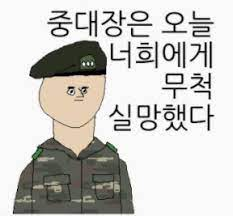
